# BUSINESS UNDERSTANDING

## Overview

Road accidents are a common occurrence in our daily lives, and it is likely that you or someone you know has been involved in one, hopefully without severe consequences. The ultimate goal is to reduce the number of road accidents. We will work with the Chicago Car Crash dataset to identify trends and predict the major causes of road accidents. By analyzing this data, we aim to develop strategies to reduce the frequency and severity of road accidents.

## Business Problem 

For this project our stakeholders are NHTSA (National Highway Traffic Safety Administration) which is the governing body in the United States of America that deals with road safety. Our objectives for our stakeholders is to explain to them:

    1. Predict the major cause of road accidents in Chicago

    2. Identify the common trends of road accidents
    
    3. Analyze the Temporal Distribution of Accidents, identify peak times and days of the week when accidents are most likely to occur.

    



## DATA UNDERSTANDING

For this project the dataset we will be using is the Chicago Car Crashes Dataset. This data set includes two csv files, Traffic Crashes - People and Traffic Crashes - Vehicles

In [20]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import xgboost as xgb
from datetime import datetime

In [2]:
#Loading the data
df1 = pd.read_csv("C:\\Users\\willi\\OneDrive\\Documents\\GitHub\\DSC-Phase-3-project\\Traffic_Crashes_-_People_20240603.csv")
df2 = pd.read_csv("C:\\Users\\willi\\OneDrive\\Documents\\GitHub\\DSC-Phase-3-project\\Traffic_Crashes_-_Vehicles_20240603.csv")


C:\Users\willi\AppData\Local\Temp\ipykernel_9264\553886820.py:2: DtypeWarning: Columns (19,23,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("C:\\Users\\willi\\OneDrive\\Documents\\GitHub\\DSC-Phase-3-project\\Traffic_Crashes_-_People_20240603.csv")
C:\Users\willi\AppData\Local\Temp\ipykernel_9264\553886820.py:3: DtypeWarning: Columns (20,39,40,41,43,47,48,49,52,54,57,58,59,60,67,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("C:\\Users\\willi\\OneDrive\\Documents\\GitHub\\DSC-Phase-3-project\\Traffic_Crashes_-_Vehicles_20240603.csv")


In [3]:
df1.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [4]:
df2.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,NaN,1634931.0,NaN,NISSAN,SENTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,NaN,1634978.0,NaN,CHRYSLER,SEBRING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,NaN,1634948.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,NaN,1637401.0,NaN,TOYOTA,RAV4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,2,DRIVER,NaN,1637408.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Understanding the dataset by getting the names of all columns and data types
print("Column names for DataFrame 1:")
print(list(df1.columns))

print("\nDataFrame 1 Information:")
df1.info()


Column names for DataFrame 1:
['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']

DataFrame 1 Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843430 entries, 0 to 1843429
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   

## Df1 column names and meaning
PERSON_ID: A unique identifier for each person record. IDs starting with 'P' indicate passengers, while IDs starting with 'O' indicate non-passengers (e.g., drivers, pedestrians, cyclists).

PERSON_TYPE: Type of roadway user involved in the crash.

CRASH_RECORD_ID: An identifier that links to the same crash in the Crashes and Vehicles datasets. Also serves as a unique ID in the Crashes dataset.

VEHICLE_ID: Corresponding CRASH_UNIT_ID from the Vehicles dataset.

CRASH_DATE: Date and time of the crash as entered by the reporting officer.

SEAT_NO: Code indicating the seating position of motor vehicle occupants.

CITY: City of residence of the person involved in the crash.

STATE: State of residence of the person involved in the crash.

ZIPCODE: ZIP Code of residence of the person involved in the crash.

SEX: Gender of the person involved in the crash, as determined by the reporting officer.

AGE: Age of the person involved in the crash.

DRIVERS_LICENSE_STATE: State issuing the driver's license of the person involved in the crash.

DRIVERS_LICENSE_CLASS: Class of driver's license of the person involved in the crash.

SAFETY_EQUIPMENT: Safety equipment used by the vehicle occupant in the crash, if any.

AIRBAG_DEPLOYED: Whether the vehicle occupant airbag deployed as a result of the crash.

EJECTION: Whether the vehicle occupant was ejected or extricated from the vehicle as a result of the crash.

INJURY_CLASSIFICATION: Severity of injury sustained by the person in the crash.

HOSPITAL: Hospital to which the injured person was taken.

EMS_AGENCY: EMS agency that transported the injured person to the hospital.

EMS_RUN_NO: EMS agency run number.

DRIVER_ACTION: Driver action that contributed to the crash, as determined by the reporting officer.

DRIVER_VISION: Objects that obscured the driver’s vision at the time of the crash.

PHYSICAL_CONDITION: Driver’s apparent physical condition at the time of the crash, as observed by the reporting officer.

PEDPEDAL_ACTION: Action of pedestrian or cyclist at the time of the crash.

PEDPEDAL_VISIBILITY: Visibility of pedestrian or cyclist safety equipment in use at the time of the crash.

PEDPEDAL_LOCATION: Location of pedestrian or cyclist at the time of the crash.

BAC_RESULT: Status of blood alcohol concentration testing for the driver or other person involved in the crash.

BAC_RESULT_VALUE: Driver’s blood alcohol concentration test result.

CELL_PHONE_USE: Whether the person was using a cellphone at the time of the crash, as determined by the reporting officer.

In [6]:
#Understanding the dataset by getting the names of all columns and data types
print("Column names for DataFrame 2:")
print(list(df2.columns))

print("\nDataFrame 1 Information:")
df2.info()


Column names for DataFrame 2:
['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE', 'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY', 'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I', 'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO', 'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE', 'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO', 'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO', 'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I', 'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I', 'TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH', 'TRAILER2_LENGTH', 'TOTAL_VEH

## DF 2 Column names and Meanings
CRASH_UNIT_ID: A unique identifier for each vehicle record.

CRASH_RECORD_ID: An identifier that links to the same crash in the Crashes and People datasets. Also serves as a unique ID in the Crashes dataset.

CRASH_DATE: Date and time of the crash as entered by the reporting officer.

UNIT_NO: A unique ID for each unit within a specific crash report.

UNIT_TYPE: The type of unit.

NUM_PASSENGERS: Number of passengers in the vehicle. Excluding the driver.

VEHICLE_ID: A unique identifier for each vehicle.

CMRC_VEH_I:

MAKE: The make (brand) of the vehicle, if relevant.

MODEL: The model of the vehicle, if relevant.

LIC_PLATE_STATE: The state issuing the license plate of the vehicle, if relevant.

VEHICLE_YEAR: The model year of the vehicle, if relevant.

VEHICLE_DEFECT:

VEHICLE_TYPE: The type of vehicle, if relevant.

VEHICLE_USE: The normal use of the vehicle, if relevant.

TRAVEL_DIRECTION: The direction in which the unit was traveling prior to the crash, as determined by the reporting officer.

MANEUVER: The action the unit was taking prior to the crash, as determined by the reporting officer.

TOWED_I: Indicator of whether the vehicle was towed.

FIRE_I:

OCCUPANT_CNT: The number of people in the unit, as determined by the reporting officer.

EXCEED_SPEED_LIMIT_I: Indicator of whether the unit was speeding, as determined by the reporting officer.

TOWED_BY: Entity that towed the unit, if relevant.

TOWED_TO: Location to which the unit was towed, if relevant.

AREA_00_I:

AREA_01_I:

AREA_02_I:

AREA_03_I:

AREA_04_I:

AREA_05_I:

AREA_06_I:

AREA_07_I:

AREA_08_I:

AREA_09_I:

AREA_10_I:

AREA_11_I:

AREA_12_I:

AREA_99_I:

FIRST_CONTACT_POINT:

CMV_ID:

USDOT_NO:

CCMC_NO:

ILCC_NO:

COMMERCIAL_SRC:

GVWR:

CARRIER_NAME:

CARRIER_STATE:

CARRIER_CITY:

HAZMAT_PLACARDS_I:

HAZMAT_NAME:

UN_NO:

HAZMAT_PRESENT_I:

HAZMAT_REPORT_I:

HAZMAT_REPORT_NO:

MCS_REPORT_I:

MCS_REPORT_NO:

HAZMAT_VIO_CAUSE_CRASH_I:

MCS_VIO_CAUSE_CRASH_I:

IDOT_PERMIT_NO:

WIDE_LOAD_I:

TRAILER1_WIDTH:

TRAILER2_WIDTH:

TRAILER1_LENGTH:

TRAILER2_LENGTH:

TOTAL_VEHICLE_LENGTH:

AXLE_CNT:

VEHICLE_CONFIG:

CARGO_BODY_TYPE:

LOAD_TYPE:

HAZMAT_OUT_OF_SERVICE_I:

MCS_OUT_OF_SERVICE_I:

HAZMAT_CLASS:


As you can see this particular dataset has a lof of columns with no meaning. What this means is that as we move along many of it's columns will need to be dropped

# Data Preparation

In [7]:
# Next is to check for any missing values in the datasets
df1.isnull().sum()

PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
VEHICLE_ID                 36954
CRASH_DATE                     0
SEAT_NO                  1470569
CITY                      501732
STATE                     481754
ZIPCODE                   611397
SEX                        30712
AGE                       537851
DRIVERS_LICENSE_STATE     763525
DRIVERS_LICENSE_CLASS     941650
SAFETY_EQUIPMENT            5150
AIRBAG_DEPLOYED            35553
EJECTION                   22908
INJURY_CLASSIFICATION        733
HOSPITAL                 1539920
EMS_AGENCY               1655687
EMS_RUN_NO               1812202
DRIVER_ACTION             376163
DRIVER_VISION             376719
PHYSICAL_CONDITION        375165
PEDPEDAL_ACTION          1808230
PEDPEDAL_VISIBILITY      1808298
PEDPEDAL_LOCATION        1808232
BAC_RESULT                375187
BAC_RESULT VALUE         1841388
CELL_PHONE_USE           1842271
dtype: int64

As you can see from above we have a lot of missing data that we have to work on. Some columns have a significant amount of missing values and it would be better to just drop them so for this we will include a threshold of 50%. If a column has more than 50% of it's data missing it will be dropped. We also have some missing values so we will also drop rows with missing values, like CRASH_RECORD_ID, PERSON_ID, and CRASH_DATE.

In [8]:
# Drop columns with too many missing values
missing_values = df1.isnull().sum()
threshold = 0.5
columns_to_drop = missing_values[missing_values > threshold * len(df1)].index
df1.drop(columns=columns_to_drop, inplace=True)

# Drop rows with missing target values or critical features
df1.dropna(subset=['CRASH_RECORD_ID', 'PERSON_ID', 'CRASH_DATE'], inplace=True)

# Impute missing values in numerical columns
df1[df1.select_dtypes(include=['number']).columns] = SimpleImputer(strategy='median').fit_transform(df1.select_dtypes(include=['number']))

# Impute missing values in categorical columns
df1[df1.select_dtypes(include=['object']).columns] = SimpleImputer(strategy='most_frequent').fit_transform(df1.select_dtypes(include=['object']))

df1.drop_duplicates(inplace=True)

df1.isnull().sum()


PERSON_ID                0
PERSON_TYPE              0
CRASH_RECORD_ID          0
VEHICLE_ID               0
CRASH_DATE               0
CITY                     0
STATE                    0
ZIPCODE                  0
SEX                      0
AGE                      0
DRIVERS_LICENSE_STATE    0
SAFETY_EQUIPMENT         0
AIRBAG_DEPLOYED          0
EJECTION                 0
INJURY_CLASSIFICATION    0
DRIVER_ACTION            0
DRIVER_VISION            0
PHYSICAL_CONDITION       0
BAC_RESULT               0
dtype: int64

Now we do the same for our other dataset

In [9]:
df2.isnull().sum()

CRASH_UNIT_ID                    0
CRASH_RECORD_ID                  0
CRASH_DATE                       0
UNIT_NO                          0
UNIT_TYPE                     2172
                            ...   
CARGO_BODY_TYPE            1698869
LOAD_TYPE                  1699477
HAZMAT_OUT_OF_SERVICE_I    1700650
MCS_OUT_OF_SERVICE_I       1700403
HAZMAT_CLASS               1711530
Length: 71, dtype: int64

In [10]:
# Drop columns with too many missing values
missing_values2 = df2.isnull().sum()
threshold = 0.5
columns_to_drop = missing_values2[missing_values2 > threshold * len(df2)].index
df2.drop(columns=columns_to_drop, inplace=True)


# For remaining missing values, decide on imputation strategy
num_cols = df2.select_dtypes(include=['number']).columns
cat_cols = df2.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers and drop duplicates
df2[num_cols] = num_imputer.fit_transform(df2[num_cols])
df2[cat_cols] = cat_imputer.fit_transform(df2[cat_cols])
df2.drop_duplicates(inplace=True)

#Convert date columns to datetime
df2['CRASH_DATE'] = pd.to_datetime(df2['CRASH_DATE'])


df2.isnull().sum()

C:\Users\willi\AppData\Local\Temp\ipykernel_9264\120631478.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['CRASH_DATE'] = pd.to_datetime(df2['CRASH_DATE'])


CRASH_UNIT_ID          0
CRASH_RECORD_ID        0
CRASH_DATE             0
UNIT_NO                0
UNIT_TYPE              0
VEHICLE_ID             0
MAKE                   0
MODEL                  0
LIC_PLATE_STATE        0
VEHICLE_YEAR           0
VEHICLE_DEFECT         0
VEHICLE_TYPE           0
VEHICLE_USE            0
TRAVEL_DIRECTION       0
MANEUVER               0
OCCUPANT_CNT           0
FIRST_CONTACT_POINT    0
dtype: int64

Next in order to save on time, and to make it easier to go through this file we will merge the two datasets in order to have all the information we need in one place. As we can see that both crash_record_id and vehicle_id exist in both datasets it is the common key that we will use to merge the datasets

In [11]:
merged_df = pd.merge(df1, df2, on=['CRASH_RECORD_ID', 'VEHICLE_ID'], how='inner')
merged_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE_x', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT', 'CRASH_UNIT_ID', 'CRASH_DATE_y',
       'UNIT_NO', 'UNIT_TYPE', 'MAKE', 'MODEL', 'LIC_PLATE_STATE',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'FIRST_CONTACT_POINT'],
      dtype='object')

Now we need to drop unnecessary columns from this dataset, as it is the final dataset that will be used for modelling. So we will only keep the necessary columns that may help make our model more accurate. Columns like CRASH_RECORD_ID or VEHICLE_ID are not necessary when modelling. The city and state columns are also not needed because all the accidents captured in this data happened in the same region. We also have some duplicate columns that need to be dropped.

In [12]:
#Drop unnecessary columns
up_merged_df = merged_df.drop(columns=['CRASH_RECORD_ID', 'VEHICLE_ID', 'CITY', 'STATE', 'FIRST_CONTACT_POINT', 'CRASH_DATE_x', 'PERSON_ID', 'ZIPCODE', 'LIC_PLATE_STATE', 'UNIT_NO', 'CRASH_UNIT_ID', 'AIRBAG_DEPLOYED', 'MANEUVER', 'EJECTION', 'SAFETY_EQUIPMENT', 'PHYSICAL_CONDITION', 'UNIT_TYPE'])
up_merged_df.head()

,PERSON_TYPE,SEX,AGE,DRIVERS_LICENSE_STATE,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,BAC_RESULT,CRASH_DATE_y,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,OCCUPANT_CNT
0,DRIVER,M,25.0,IL,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,TEST NOT OFFERED,2019-09-28 03:30:00,HONDA,CIVIC,2016.000000,UNKNOWN,PASSENGER,PERSONAL,N,1.0
1,DRIVER,M,37.0,IL,NO INDICATION OF INJURY,NONE,NOT OBSCURED,TEST NOT OFFERED,2020-04-13 22:50:00,BUICK,ENCORE,2014.095993,NONE,PASSENGER,PERSONAL,W,1.0
2,DRIVER,X,35.0,IL,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,TEST NOT OFFERED,2015-11-01 05:00:00,UNKNOWN,UNKNOWN,2014.095993,NONE,PASSENGER,PERSONAL,E,1.0
3,DRIVER,X,35.0,IL,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,TEST NOT OFFERED,2015-11-01 08:00:00,UNKNOWN,UNKNOWN,2014.095993,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,UNKNOWN,1.0
4,DRIVER,X,35.0,IL,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,TEST NOT OFFERED,2015-11-01 10:15:00,UNKNOWN,UNKNOWN,2014.095993,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,UNKNOWN,1.0


In [68]:
#Additional Data cleaning required

#Normalise the age data in order to ensure modelling and visualization goes smoothly
scaler = StandardScaler()

up_merged_df['AGE'] = scaler.fit_transform(up_merged_df[['AGE']])

# Replace 'Other' with 'OTHER' in the DRIVER_ACTION column
up_merged_df['DRIVER_ACTION'] = up_merged_df['DRIVER_ACTION'].replace('Other', 'OTHER')



C:\Users\willi\AppData\Local\Temp\ipykernel_9264\2927242088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_merged_df['AGE'] = scaler.fit_transform(up_merged_df[['AGE']])
C:\Users\willi\AppData\Local\Temp\ipykernel_9264\2927242088.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_merged_df['DRIVER_ACTION'] = up_merged_df['DRIVER_ACTION'].replace('Other', 'OTHER')


### Visualization

Before modelling we need to understand our data and to do this we can use visualizations. To try and spot trends and answer some of our objectives even before modelling.

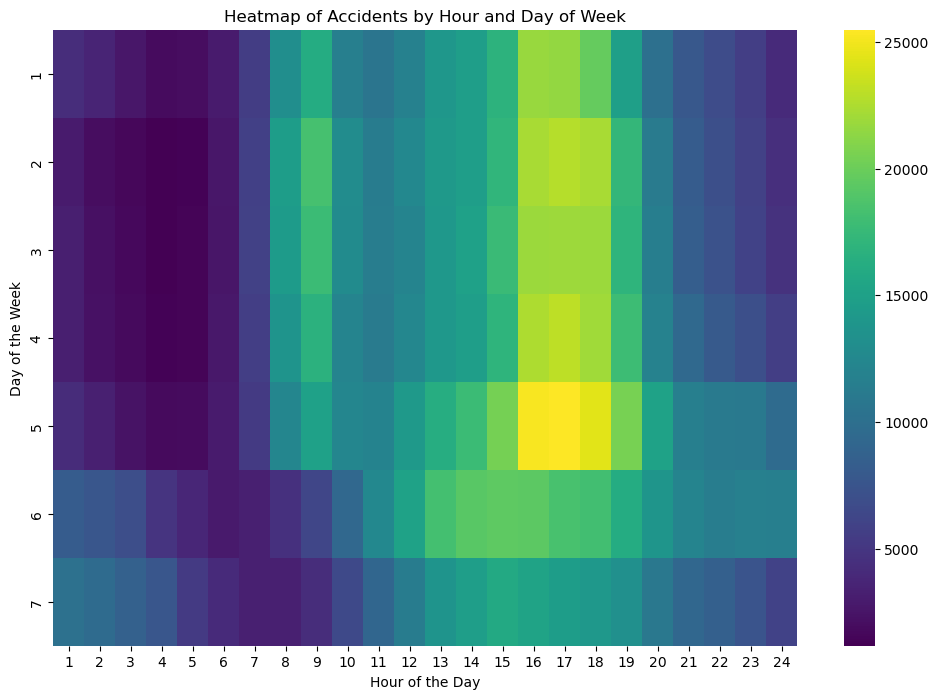

In [57]:
#Heatmap of Accidents by hour and day of week
up_merged_df['Hour'] = up_merged_df.index.hour + 1 
up_merged_df['DayOfWeek'] = up_merged_df.index.dayofweek + 1 #to ensure starts at 1 not 0

heatmap_data = up_merged_df.groupby(['DayOfWeek', 'Hour']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Accidents by Hour and Day of Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


As we can see from the chart above most accidents occur on the fifth day of the week. So this tells us that most accidents happen from Thursday from 15:30 - 17:30 why? People rushing home from work or school?

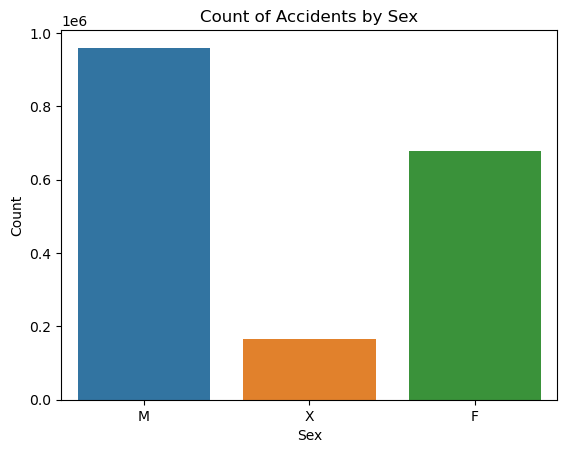

In [58]:
# Bar plot of count of accidents by sex
sns.countplot(x='SEX', data=up_merged_df)
plt.title('Count of Accidents by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


The chart tells us that more men get into accidents than women.

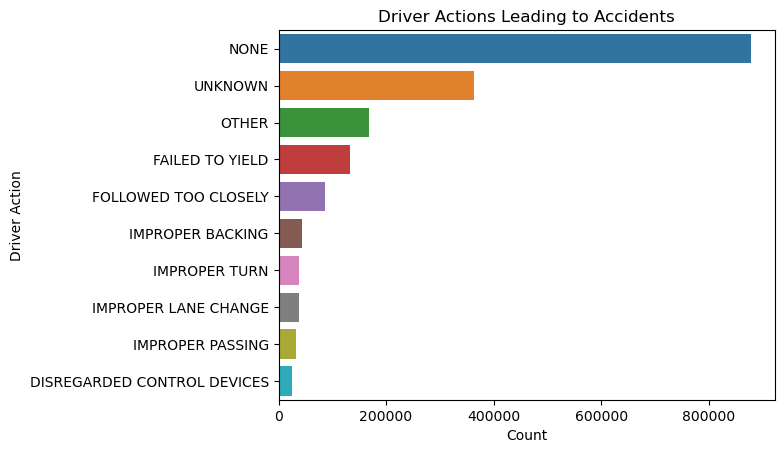

In [59]:
#Bar plot of driver actions leading to accidents

sns.countplot(y='DRIVER_ACTION', data=up_merged_df, order=up_merged_df['DRIVER_ACTION'].value_counts().index)
plt.title('Driver Actions Leading to Accidents')
plt.xlabel('Count')
plt.ylabel('Driver Action')
plt.show()


The most common driver action that leads to accidents is failing to yield 

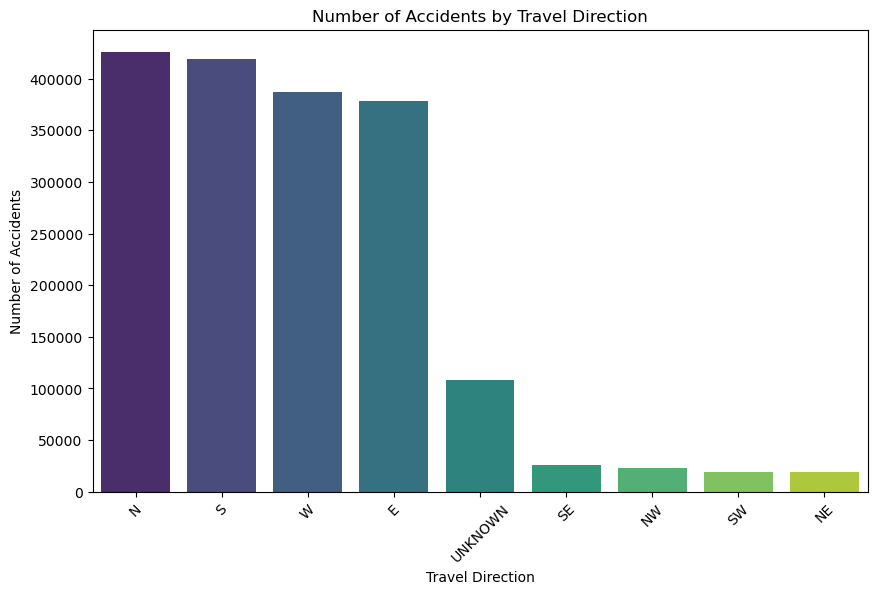

In [60]:
# Bar plot of number of accidents by travel direction

direction_counts = up_merged_df['TRAVEL_DIRECTION'].value_counts()

# Plotting the travel direction counts
plt.figure(figsize=(10, 6))
sns.barplot(x=direction_counts.index, y=direction_counts.values, palette='viridis')
plt.title('Number of Accidents by Travel Direction')
plt.xlabel('Travel Direction')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

It seems like most accidents happen when travelling to the North. Does this mean that these roads are more dangerous or more dangerous drivers reside that side?

C:\Users\willi\AppData\Local\Temp\ipykernel_9264\3971528703.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_merged_df['OCCUPANT_CNT_GROUP'] = pd.cut(up_merged_df['OCCUPANT_CNT'], bins=bins, labels=labels, right=False)
c:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


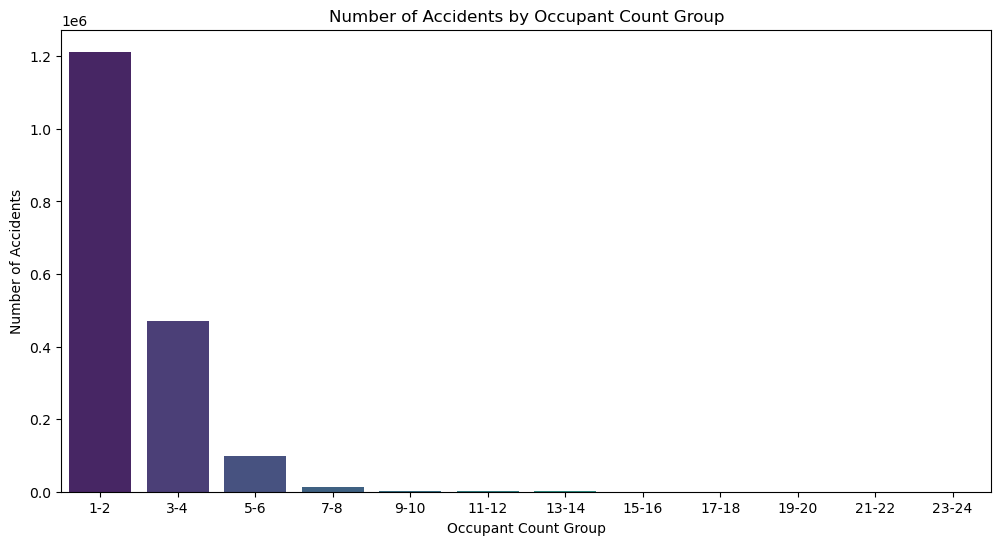

In [70]:
# Bar plot of count of number of accidents by Occupant Count Group 

# Define the bins for occupant count
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

# Create labels for the bins
labels = ['1-2', '3-4', '5-6', '7-8', '9-10', '11-12', '13-14', '15-16', '17-18', '19-20', '21-22', '23-24']

# Add a new column to the DataFrame with the bin labels
up_merged_df['OCCUPANT_CNT_GROUP'] = pd.cut(up_merged_df['OCCUPANT_CNT'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.countplot(x='OCCUPANT_CNT_GROUP', data=up_merged_df, palette='viridis')
plt.title('Number of Accidents by Occupant Count Group')
plt.xlabel('Occupant Count Group')
plt.ylabel('Number of Accidents')
plt.show()

c:\Users\willi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


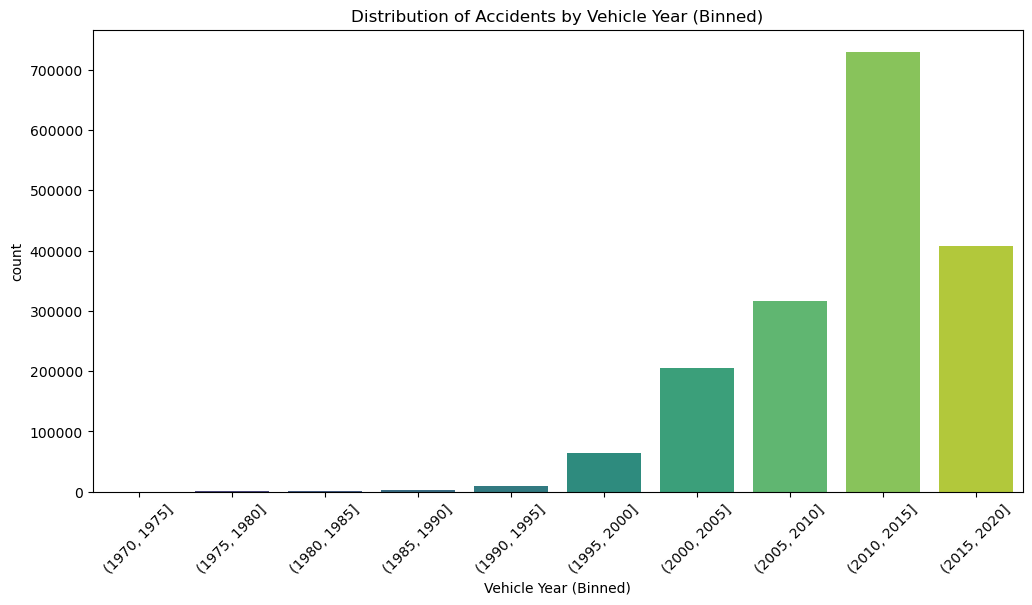

In [72]:
# Creating temporary bins for VEHICLE_YEAR
bins = pd.cut(up_merged_df['VEHICLE_YEAR'], bins=range(1970, 2025, 5))

# Plotting the count of accidents by the bins
plt.figure(figsize=(12, 6))
sns.countplot(x=bins, data=up_merged_df, palette='viridis')
plt.title('Distribution of Accidents by Vehicle Year (Binned)')
plt.xlabel('Vehicle Year (Binned)')
plt.xticks(rotation=45)
plt.show()

### One Hot Encoding

The next thing is to convert out categorical data into data that can be fed into machine learning algorithms. But due to the fact that we already have quite a number of columns we will need to tweak our approach to this. We will do this by:
Limiting the number of Categories: For each categorical variable, we keep only the most frequent categories and group the rest into an "Other" category.


In [61]:
# Define a function to limit the number of categories
def limit_categories(series, top_n=7):
    top_categories = series.value_counts().nlargest(top_n).index
    return series.apply(lambda x: x if x in top_categories else 'Other')

# Apply the function to relevant columns
categorical_columns = ['PERSON_TYPE', 'SEX', 'DRIVERS_LICENSE_STATE',
                       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
                        'BAC_RESULT', 'MAKE', 
                       'MODEL', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
                       'TRAVEL_DIRECTION']

for col in categorical_columns:
    up_merged_df[col] = limit_categories(up_merged_df[col], top_n=10)

# One-hot encode the limited categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(up_merged_df[categorical_columns])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original DataFrame
final_df = pd.concat([up_merged_df.drop(columns=categorical_columns), encoded_df], axis=1)


final_df.head()

c:\Users\willi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


InvalidIndexError: Reindexing only valid with uniquely valued Index objects